In [15]:
import geokit as gk
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

# RegionMask
The RegionMask object is the geospatial representation of the given region, allows to combine raster and vector operations and many functions. 
The following shows only a few examples of these. 



Example for the Aachen-Region

In [16]:
# define the srs
aachen_centered_srs = gk.srs.centeredLAEA(6.083, 50.775)

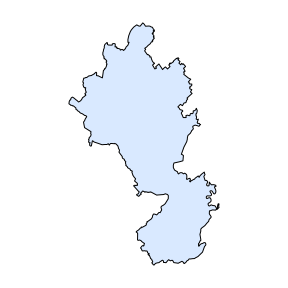

In [17]:
# load the region mask from the passed shape file
import pathlib
from geokit.get_test_data import get_test_shape_file

data_cache_folder = pathlib.Path().cwd().parent.joinpath("data")


aachen_rm = gk.RegionMask.load(
    get_test_shape_file(
        file_name_without_extension="aachenShapefile",
        extension=".shp",
        data_cache_folder=data_cache_folder,
    ),
    pixelRes=20,
    srs=aachen_centered_srs,
)
aachen_rm

In [18]:
# Print information about the region mask
print("aachen_rm.extent", aachen_rm.extent)
# print("aachen_rm.srs", aachen_rm.srs)
print("aachen_rm.pixelWidth", aachen_rm.pixelWidth)
print("aachen_rm.pixelHeight", aachen_rm.pixelHeight)

aachen_rm.extent (-7640.00000,-31220.00000,23820.00000,19500.00000)
aachen_rm.pixelWidth 20
aachen_rm.pixelHeight 20


## Region Mask and Raster-File

A RegionMask object allows raster data to be warped onto the RegionMask's characteristics (as in the RegionMask's resolution, extent, and spatial reference system). This create a numpy matrix, from which only the pixels which lie in the region can be easily extracted and operated on.


Example: Extract the GHI-data for Aachen from a raster-file for the GHI in Germany.


In [29]:
from geokit.get_test_data import get_test_data

ras = aachen_rm.warp(
    get_test_data(file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder),
    returnMatrix=False,
)

Draw Raster file in RegionMask.

AxHands(ax=<Axes: >, handles=<matplotlib.image.AxesImage object at 0x0000020213D609A0>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000020213DFD510>)

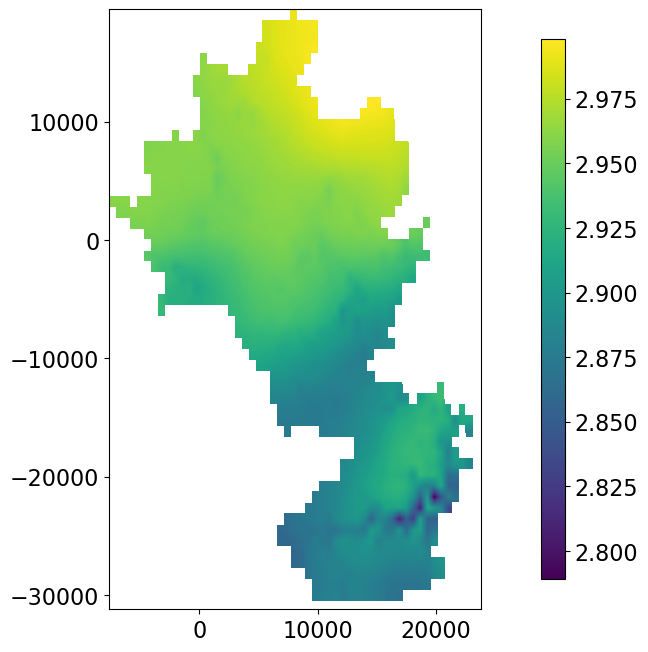

In [30]:
gk.drawRaster(ras, figsize=(6, 6))

Raster values: Average values and histogram

In [39]:
# Get the average of raster values which are within the region mask
aachen_rm.warp(
    get_test_data(file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder)
)[aachen_rm.mask].mean()

2.9310975

(array([1.93000e+02, 1.28100e+03, 4.91500e+03, 6.80170e+04, 3.40446e+05,
        1.96429e+05, 2.64498e+05, 2.99985e+05, 4.26737e+05, 1.71008e+05]),
 array([2.78905106, 2.81000066, 2.83095026, 2.8519001 , 2.8728497 ,
        2.8937993 , 2.91474891, 2.93569851, 2.95664835, 2.97759795,
        2.99854755]),
 <BarContainer object of 10 artists>)

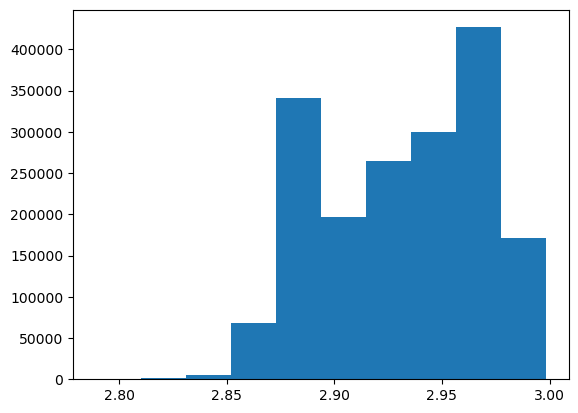

In [47]:
# plot histogramm of the values
plt.hist(
    aachen_rm.warp(
        get_test_data(file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder)
    )[aachen_rm.mask]
)

## Region Mask and shp-file

Extract feature in a df.

In [54]:
aachen_points = aachen_rm.extractFeatures(
    get_test_shape_file(
        file_name_without_extension="turbinePlacements",
        extension=".shp",
        data_cache_folder=data_cache_folder,
    )
)
aachen_points.head()

,geom,FID
0,POINT (5.98519518411592 50.7972538800796),0
1,POINT (5.9946850348875 50.7942084158756),1
2,POINT (5.99410693905033 50.800938904832),2
3,POINT (6.0047500934257 50.7844315976052),3
4,POINT (6.00417362866228 50.7911621621515),4


1. Example: Show features in the region mask.

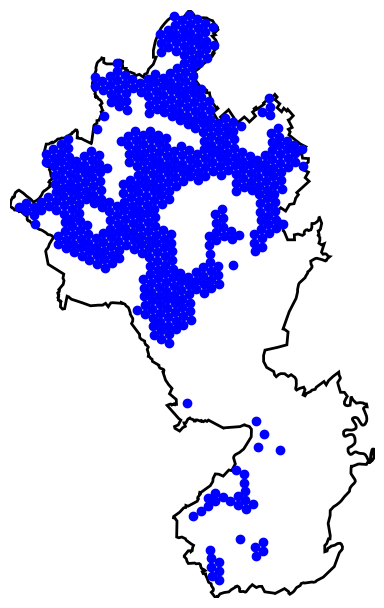

In [55]:
axh = aachen_rm.drawGeoms(aachen_points, figsize=(5, 6), hideAxis=True, color="b")
plt.show()

2. Example: Indicate features directly in region mask. Include a buffer around the features.

C:\Programming\geokit\geokit\core\regionmask.py:1560: UserWarning: Memory efficient multiProcess failed, returning to safe linear processing.
  warn(


Memory useage during calc: 573.80078125 MB


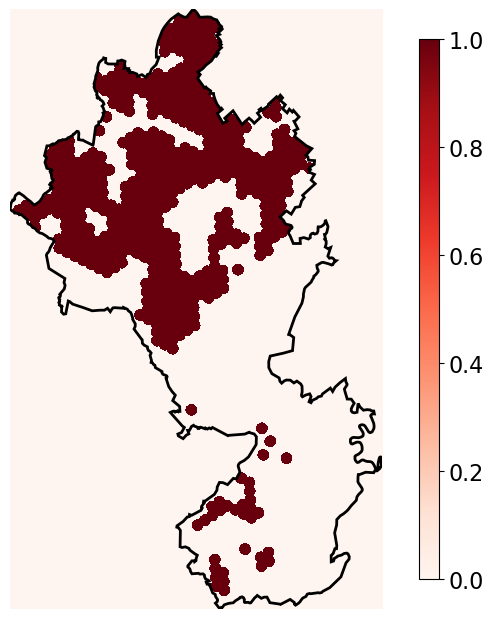

In [60]:
# Indicate RegionMask pixels within 500 meters of these points
isNearToTurbine = aachen_rm.indicateFeatures(
    get_test_shape_file(
        file_name_without_extension="turbinePlacements",
        extension=".shp",
        data_cache_folder=data_cache_folder,
    ),
    buffer=500,
)
# Visualize it!
axh = aachen_rm.drawImage(
    isNearToTurbine,
    figsize=(5, 6),
    hideAxis=True,
    cmap="Reds",
)
plt.show()

## Export a raster-tif-file for the region 

In [61]:
# Create a raster
example_data = np.ones_like(aachen_rm.mask)
aachen_rm.createRaster(data=example_data, output="./rm_raster.tif")

'./rm_raster.tif'

## Indicate areas with values

Memory useage during calc: 597.26171875 MB


AxHands(ax=<Axes: >, handles=<matplotlib.image.AxesImage object at 0x0000020212B3A6E0>, cbar=<matplotlib.colorbar.Colorbar object at 0x00000202128B88E0>)

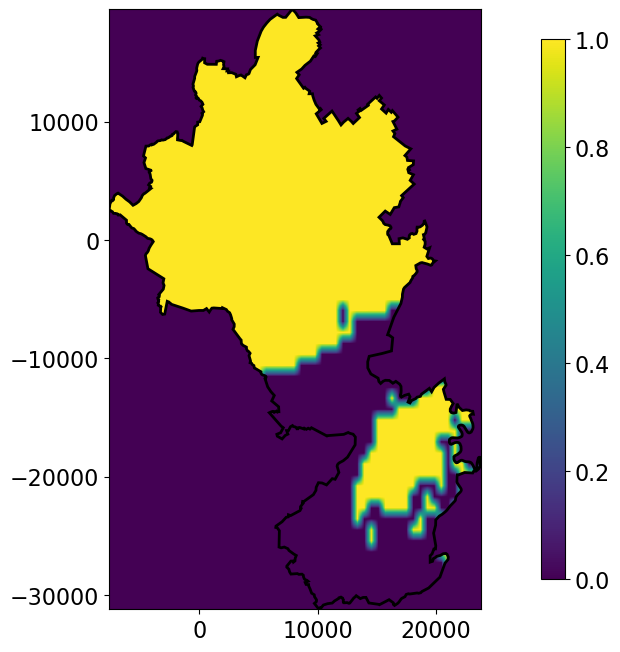

In [64]:
# Show areas with GHI values > 2.9
tmp = aachen_rm.indicateValues(
    source=get_test_data(
        file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder
    ),
    value=(2.9, None),
)

aachen_rm.drawImage(tmp, figsize=(6, 6))

C:\Programming\geokit\geokit\core\regionmask.py:958: UserWarning: Multiprocessing has been set to 'False' because it is not available for Windows or Mac. To deactivate this warning, please set the multiProcess variable to False. On Windows and Mac, new processes must be spawned, which requires the serialisation of the method to be executed via multiprocessing. However, Geokit contains objects that cannot be serialised by Pickle. On Linux, however, new processes are inherited and no serialisation is required.
  warn(multi_processing_warning_message)


Memory useage during calc: 628.59375 MB


AxHands(ax=<Axes: >, handles=<matplotlib.image.AxesImage object at 0x000002020B287250>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000020212BA40A0>)

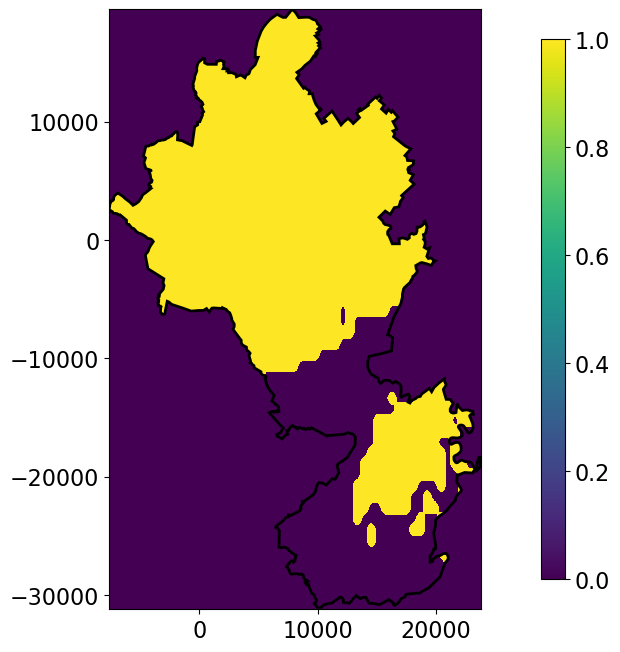

In [66]:
# Show areas with GHI values > 2.9 with buffer
tmp = aachen_rm.indicateValues(
    source=get_test_data(
        file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder
    ),
    value=(2.9, None),
    buffer=100,
)

aachen_rm.drawImage(tmp, figsize=(6, 6))